In [1]:
import os
import tensorflow as tf
import imghdr

data_dir = 'data'
image_ext = ['jpeg','jpg','bmp','png','png','svg']


for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)

    try:
      tip = imghdr.what(image_path)
      if tip not in image_ext:
        print('invalid image extension {}'.format(image_path))
        os.remove(image_path)
    except Exception as e :
      print('issue with the image {}'.format(image_path))


ModuleNotFoundError: No module named 'tensorflow'

In [7]:
import cv2
from matplotlib import pyplot as plt
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

ModuleNotFoundError: No module named 'cv2'

In [5]:
img = cv2.imread(os.path.join('data','happy','Happy.jpg'))
img

NameError: name 'cv2' is not defined

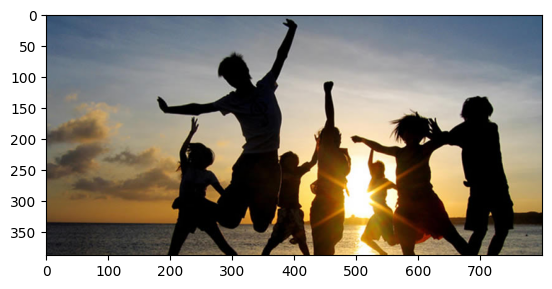

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Found 275 files belonging to 2 classes.


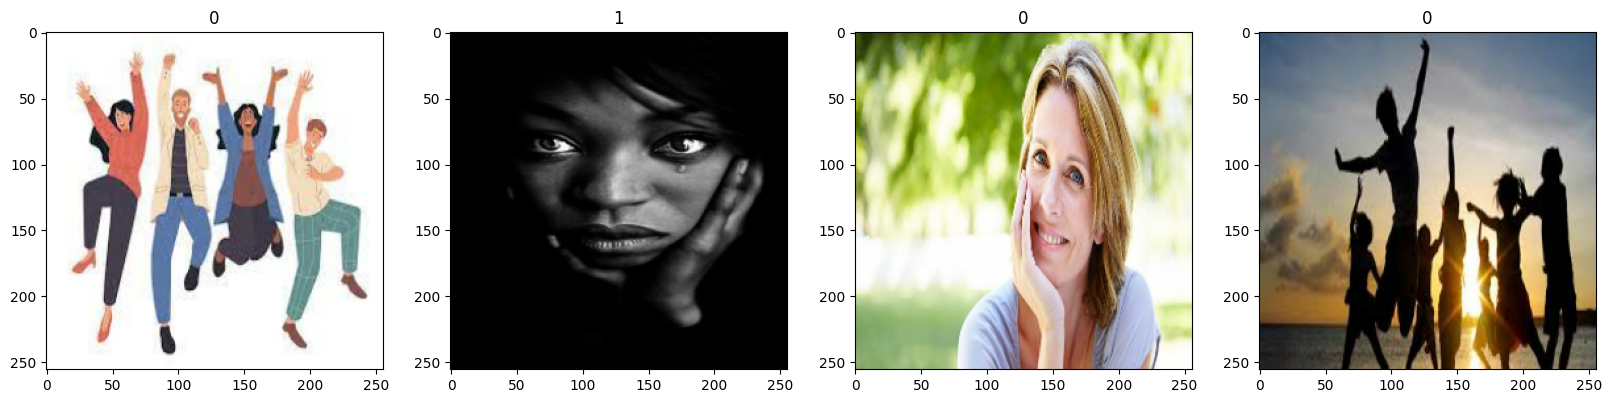

In [26]:
import numpy as np
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


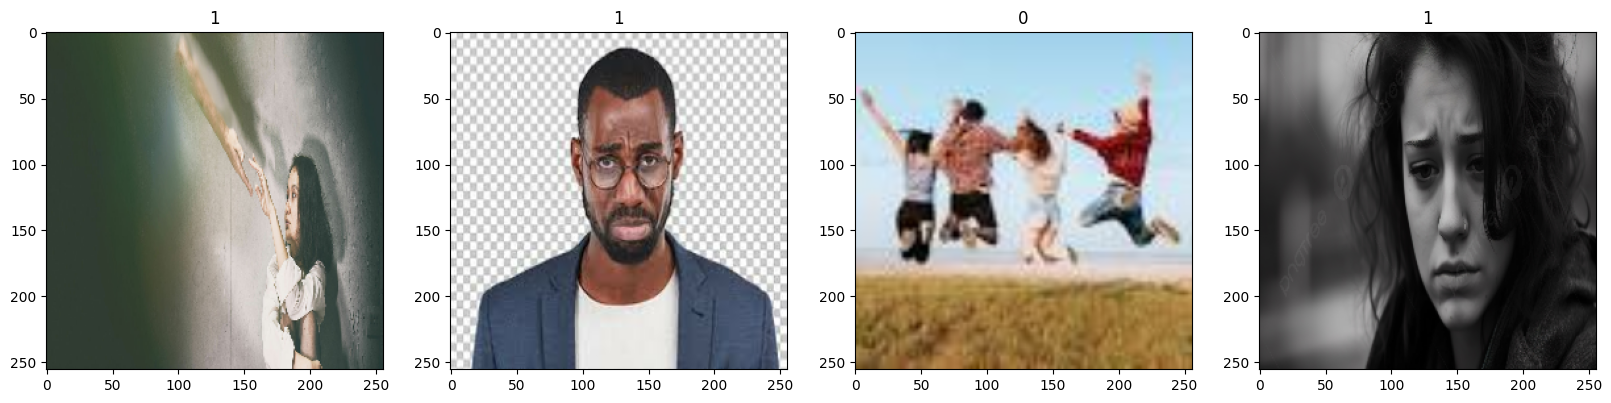

In [27]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
#scaled_iterator.next()[0].max()
batch = scaled_iterator.next()
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [33]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
train_size+val_size+test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
len(train)

6

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile('Adadelta',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [36]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50
6/6 [==============================] - 16s 2s/step - loss: 0.7016 - accuracy: 0.4896 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 18s 3s/step - loss: 0.7015 - accuracy: 0.4531 - val_loss: 0.7058 - val_accuracy: 0.4375
Epoch 3/50
6/6 [==============================] - 17s 2s/step - loss: 0.6973 - accuracy: 0.4688 - val_loss: 0.6933 - val_accuracy: 0.5312
Epoch 4/50
6/6 [==============================] - 18s 3s/step - loss: 0.6972 - accuracy: 0.4583 - val_loss: 0.6941 - val_accuracy: 0.4688
Epoch 5/50
6/6 [==============================] - 16s 2s/step - loss: 0.6987 - accuracy: 0.4271 - val_loss: 0.6931 - val_accuracy: 0.4844
Epoch 6/50
6/6 [==============================] - 17s 3s/step - loss: 0.6972 - accuracy: 0.4062 - val_loss: 0.6942 - val_accuracy: 0.4688
Epoch 7/50
6/6 [==============================] - 17s 3s/step - loss: 0.6951 - accuracy: 0.4271 - val_loss: 0.6900 - val_accuracy: 0.5625
Epoch 8/50
6/6 [==================

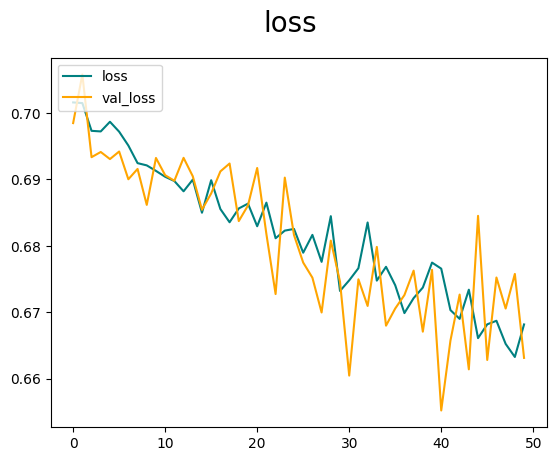

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

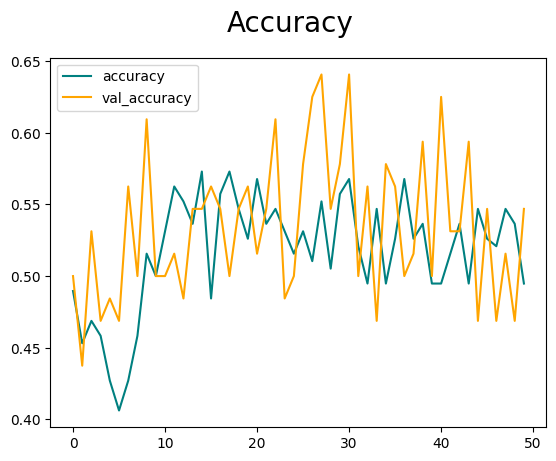

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  prec.update_state(y,yhat)
  rec.update_state(y,yhat)
  acc.update_state(y,yhat)
print(f'Precision:{prec.result().numpy()},Recall:{rec.result().numpy()},Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 254ms/step
Precision:0.0,Recall:0.0,Accuracy:0.6842105388641357


In [42]:
model.save(os.path.join('models','faceExpression.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
